### 第 9 章 绘图和可视化
- [9.1 matplotlib API 入门](#9.1-matplotlib-API入门)
    - [Figure 和 Subplot](#Figure和Subplot)
    - [调整 subplot 周围的间距](#调整subplot周围的间距)
    - [颜色、标记和线型](#颜色、标记和线型)
    - [刻度、标签和图例](#刻度、标签和图例)
    - [设置标题、轴标签、刻度以及刻度标签](#设置标题、轴标签、刻度以及刻度标签)
    - [添加图例](#添加图例)
    - [注解以及在 Subplot 上绘图](#注解以及在Subplot上绘图)
    - [将图表保存到文件](#将图表保存到文件)
    - [matplotlib 配置](#matplotlib配置)
- [9.2 使用 pandas 和 seaborn 绘图](#9.2-使用pandas和seaborn绘图)
    - [线型图](#线型图)
    - [柱状图](#柱状图)
    - [直方图和密度图](#直方图和密度图)
    - [散布图或点图](#散布图或点图)
    - [分面网格(facet grid)和类型数据](#分面网格(facet-grid)和类型数据)
- [9.3 其它的 Python 可视化工具](#9.3-其它的Python可视化工具)

In [2]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 5
np.random.seed(12345)
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline

#### 9.1-matplotlib-API入门
##### Figure和Subplot
- 参数figsize：它用于确保当图片保存到磁盘时具有一定的大小和纵横比
- 参数add_subplot：子图设置
    - （a, b, c） 图像是a*b, c表示第几副图

<img src='images/9_1.png'>

In [5]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

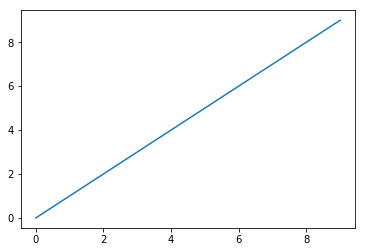

In [6]:
plt.plot(data)

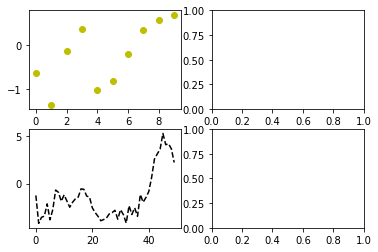

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
plt.plot(np.random.randn(10).cumsum(), 'yo')
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
ax3 = fig.add_subplot(2, 2, 4)

In [27]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

In [28]:
plt.close('all')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12402a438>,
      dtype=object)

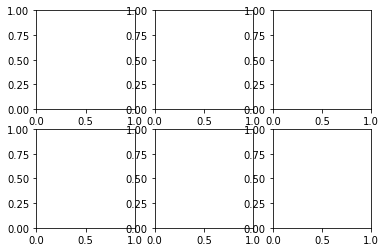

In [29]:
fig, axes = plt.subplots(2, 3)
axes

##### 调整subplot周围的间距
- subplots_adjust
    - 参数wspace 和 hspace 
        - 用于控制宽度和高度的百分比
        - 可以用作 subplot 之间的间距

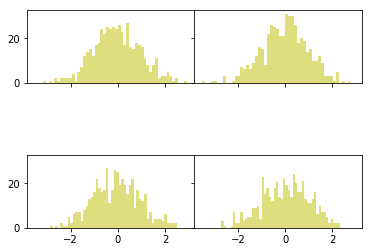

In [34]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        t = axes[i, j].hist(np.random.randn(500), bins=50, color='y', alpha=0.5)
t =plt.subplots_adjust(wspace=0, hspace=1)

##### 颜色、标记和线型
- 字符串【颜色 + 标记 + 线型】
- 线型 linestype 
- 颜色 color
- 标记 marker='o'
- 画图方式 drawstyle
- 标签 label

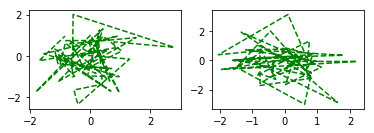

In [41]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(np.random.randn(50), np.random.randn(50), 'g--')
ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(np.random.randn(50), np.random.randn(50), linestyle='--', color='g')

In [42]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

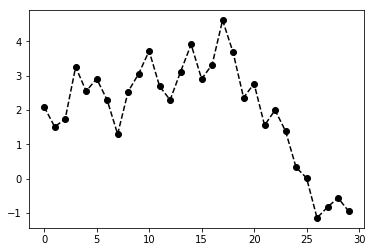

In [43]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

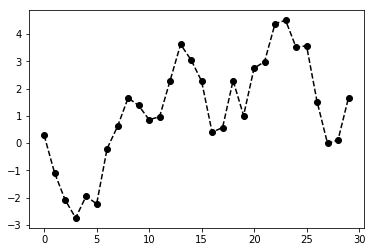

In [45]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

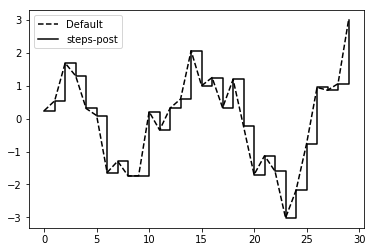

In [46]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

##### 刻度、标签和图例
- plt.xlim()
    - 不带参 返回当前的 X 轴绘图范围
    - 带参[a,b] 将 X 轴的范围设置为 a 到 b

##### 设置标题、轴标签、刻度以及刻度标签
- 改变 x 轴刻度
    - set_xticks 改为数值
    - set_xticklabels 改为标签
- ax.set(**props)
    - 传入字典设置各种参数

Text(0.5, 1.0, 'set_xticks')

Text(0.5, 1.0, 'set_xticklabels')

[Text(0.5, 0, 'Stages'), Text(0.5, 1.0, 'My first matplotlib plot')]

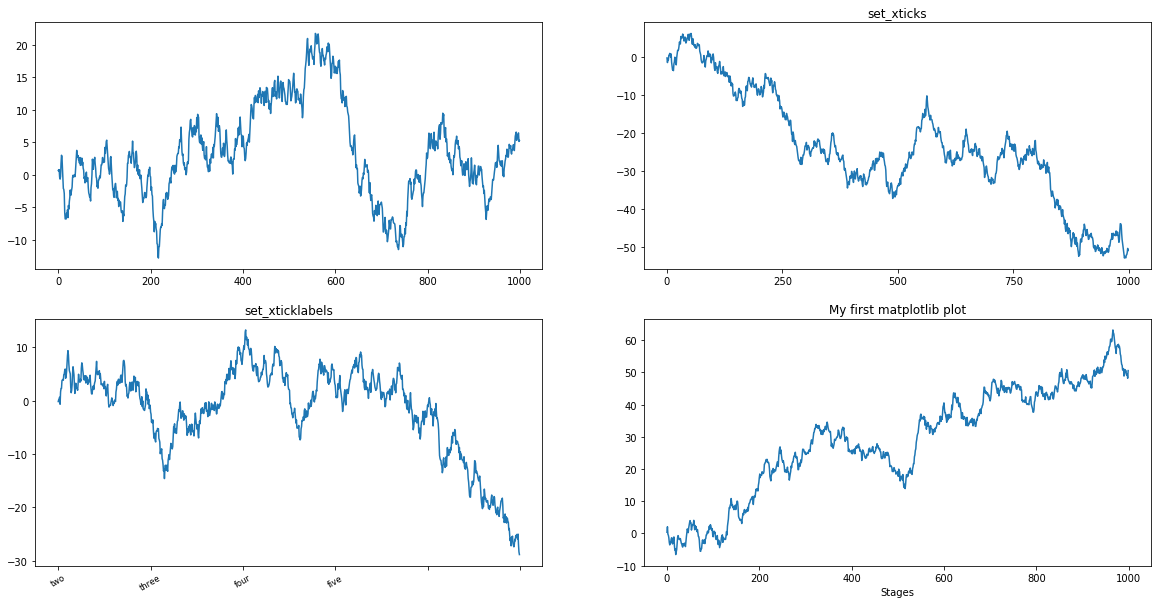

In [65]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(np.random.randn(1000).cumsum())
ax2 = fig.add_subplot(2, 2, 2)
ticks = ax2.set_xticks([0, 250, 500, 750, 1000])
ax2.set_title('set_xticks')
ax2.plot(np.random.randn(1000).cumsum())
ax3 = fig.add_subplot(2, 2, 3)
labels = ax3.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax3.set_title('set_xticklabels')
ax3.plot(np.random.randn(1000).cumsum())
ax4 = fig.add_subplot(2, 2, 4)
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax4.set(**props)
ax4.plot(np.random.randn(1000).cumsum())

##### 添加图例
- legend

<img src='images/9_2.png'>

<img src='images/9_3.png'>

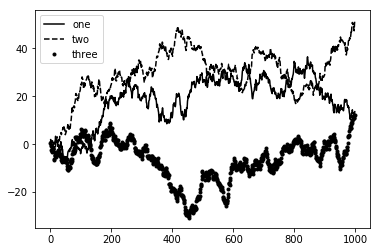

In [67]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

##### 注解以及在Subplot上绘图
- ax.annotate
    - 在指定的 x 和 y 坐标 轴绘制标签

Text(2007-10-11 00:00:00, 1779.41, 'Peak of bull market')

Text(2008-03-12 00:00:00, 1533.77, 'Bear Stearns Fails')

Text(2008-09-15 00:00:00, 1417.7, 'Lehman Bankruptcy')

(732677.0, 734138.0)

(600, 1800)

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

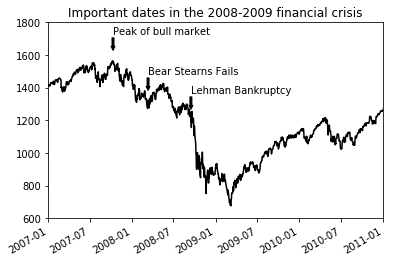

In [70]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

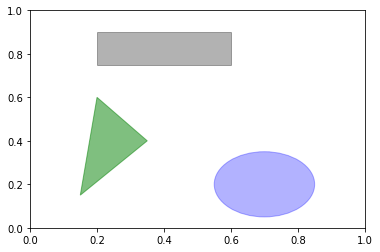

In [71]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

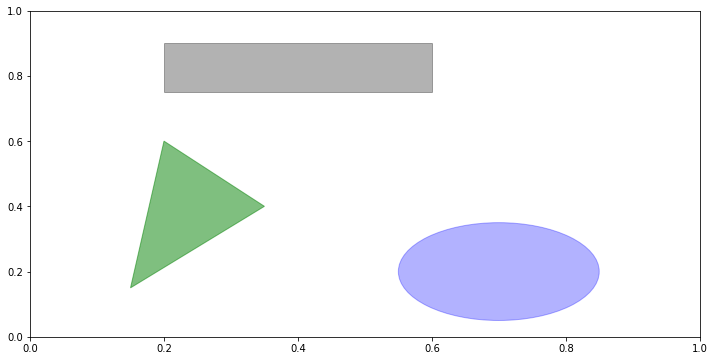

In [72]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

##### 将图表保存到文件
- plt.savefig
    - 首参 文件名
    - dpi=400 分辨率
    - bbox_inches='tight' 带有小白边

<img src='images/9_4.png'>

In [73]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 432x288 with 0 Axes>

##### matplotlib配置

- plt.rc('figure', figsize=(10, 10))
    - 第一个参数是希望自定义的对象，如'figure'、'axes'、'xtick'、 'ytick'、'grid'、'legend'等
    - 第二个参数跟上一系列的关键字参数或者是字典

In [77]:
# font_options = {'family' : 'monospace',
#                 'weight' : 'bold',
#                 'size'   : 'small'}
# plt.rc('font', **font_options)

#### 9.2-使用pandas和seaborn绘图
##### 线型图
- Series.plot
- DataFrame.plot

<img src='images/9_5.png'>

<img src='images/9_6.png'>

<img src='images/9_7.png'>

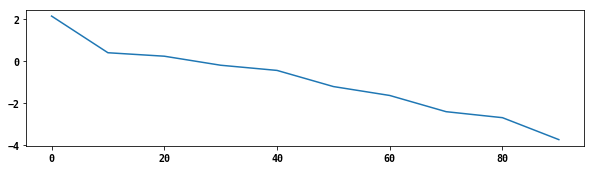

In [81]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot(figsize=(10,2.5))

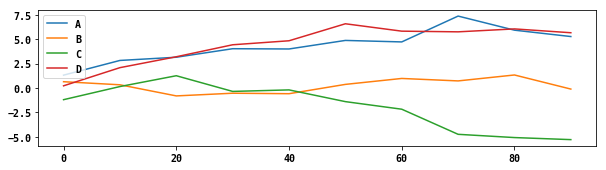

In [83]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot(figsize=(10,2.5))

##### 柱状图
- plot.bar()和 plot.barh()
- 参数stacked=True 是否堆积
- seaborn
    - sns.barplot
        - 参数orient='h' 方向
    - sns.set(style="whitegrid")

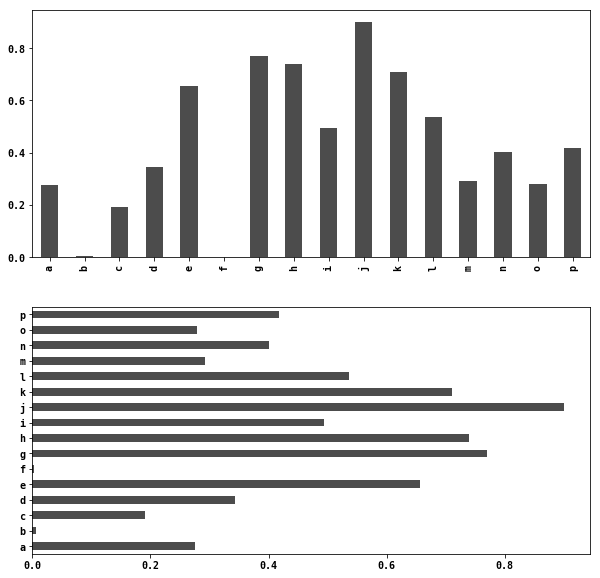

In [86]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
...,...,...,...,...
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


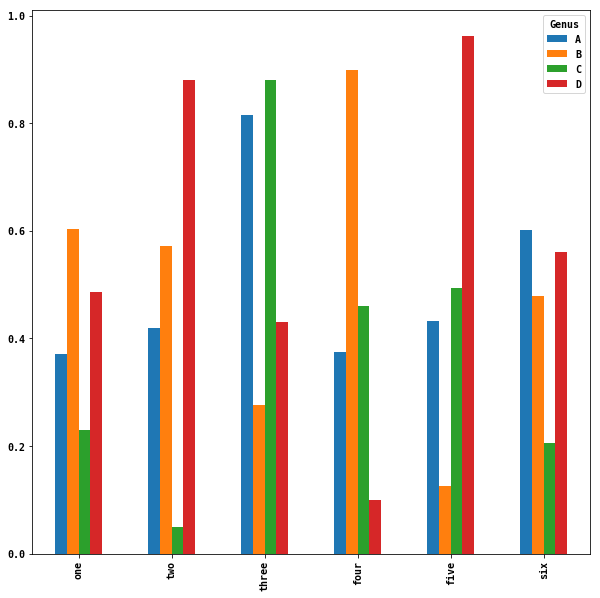

In [89]:
np.random.seed(12348)
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot.bar()

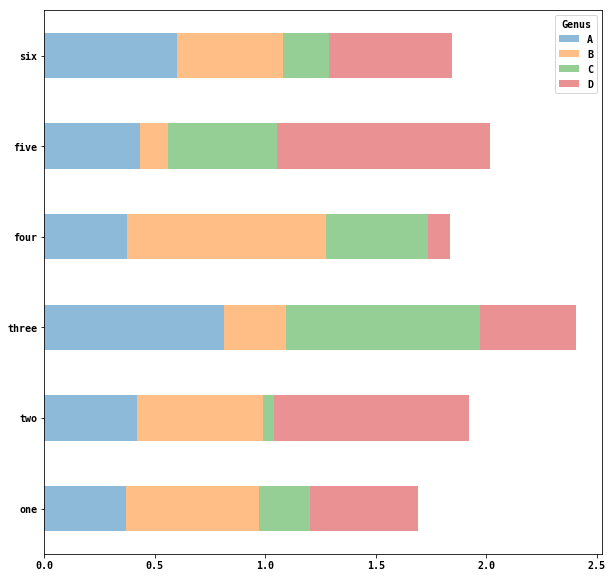

In [90]:
df.plot.barh(stacked=True, alpha=0.5)

In [9]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


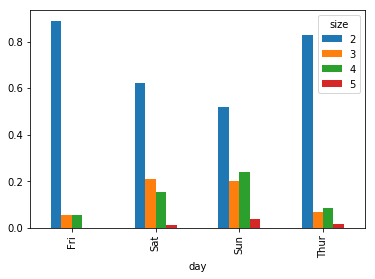

In [10]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts
party_pcts.plot.bar()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


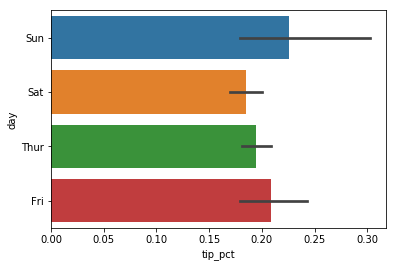

In [11]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

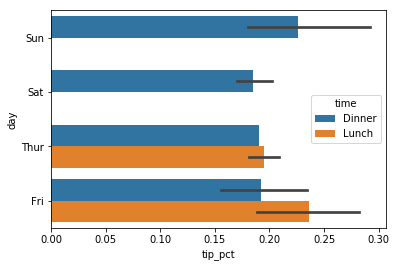

In [12]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [13]:
sns.set(style="whitegrid")

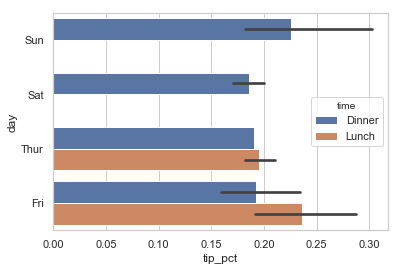

In [14]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

##### 直方图和密度图
- Series.plot.hist 直方图
    - bins 分组
- Series.plot.density 密度图
- sns.distplot 直方图和密度图

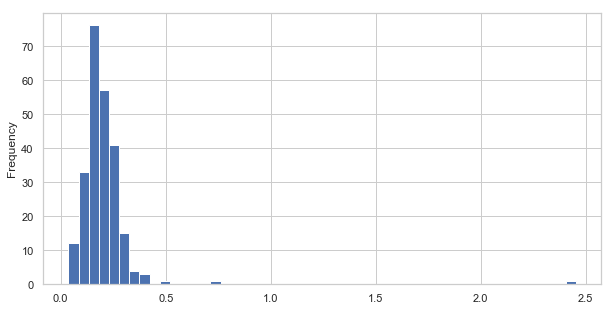

In [15]:
tips['tip_pct'].plot.hist(bins=50, figsize=(10,5))

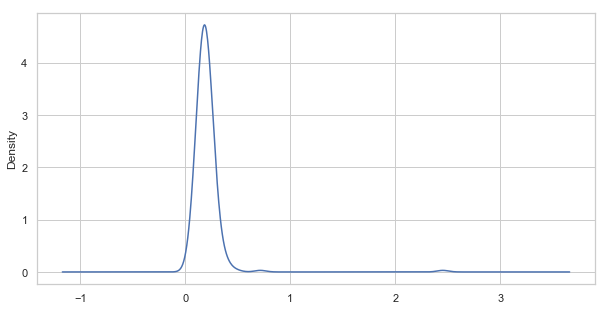

In [16]:
tips['tip_pct'].plot.density(figsize=(10,5))

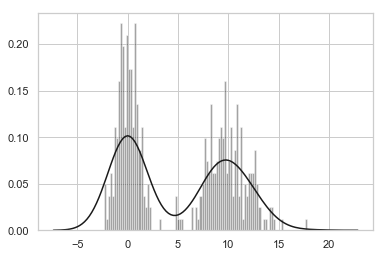

In [17]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

##### 散布图或点图
- sns.regplot()
    - data DataFrame
    - 前两个字符串是 x  y 的在data里面的列名
- 散布图矩阵 sns.pairplot

In [18]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

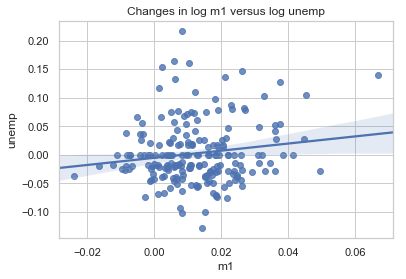

In [19]:
plt.figure()
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

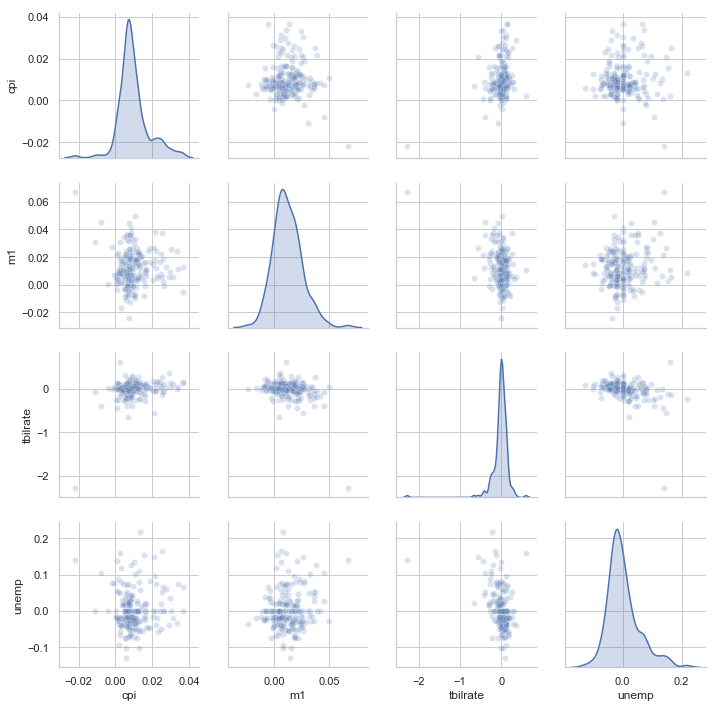

In [20]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

##### 分面网格(facet-grid)和类型数据
- sns.factorplot
    - 多个分类变量的数据可视化
    - kind='bar' 支持其它的绘图类型，例如，盒图(它可以显示中位数，四分位数，和异常值)

/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


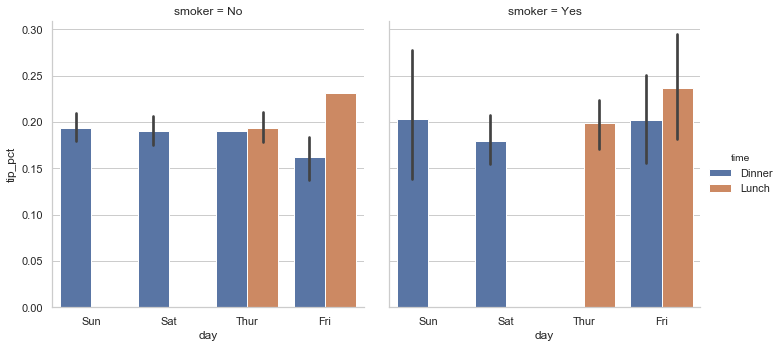

In [21]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


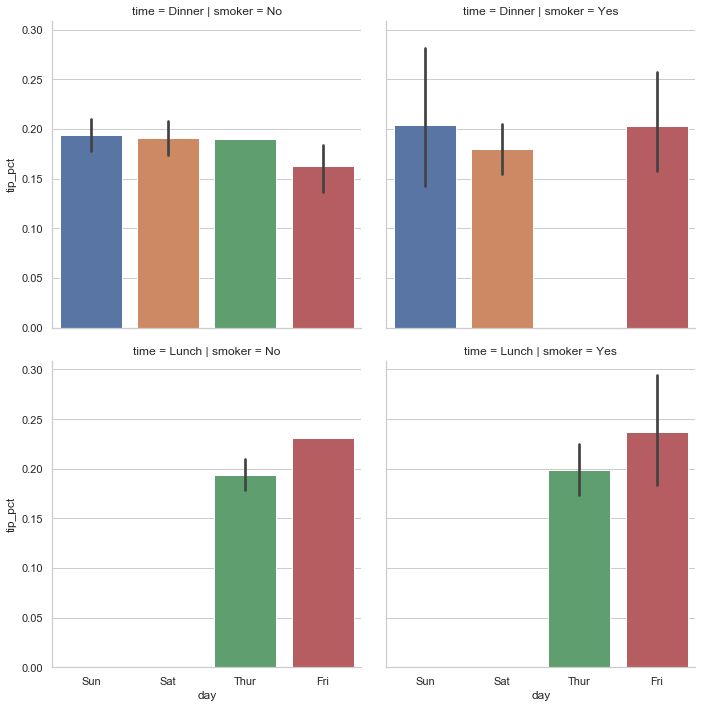

In [22]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


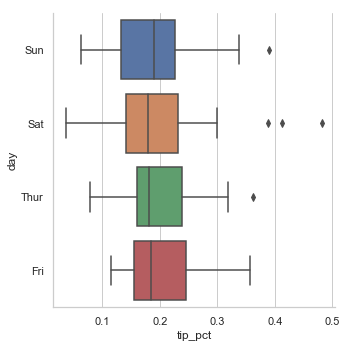

In [23]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

#### 9.3-其它的Python可视化工具

In [25]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS